# Libraries

In [1]:
import time
import pandas as pd
import joblib
import os
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

# Pipeline

In [2]:
%load_ext autoreload
%autoreload 2
from configuration.Pipeline import Pipeline

In [3]:
selected_cols = ['age',
                'sex',
                'height',
                'body_weight',
                'body_temperature',
                'alcohol',
                'smoking',
                'Dysuria',
                'Anorexia',
                'Nausea/vomiting',
                'Rebound tenderness',
                'Peritonitis/abdominal guarding',
                'Tenderness in right lower quadrant',
                'Cough tenderness',
                'WBC',
                'RBC',
                'Leukocytes',
                'Alvarado Score (AS)',
                'Pediatric appendicitis score (PAS)']


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


def create_plot(as_score, pas_score):
    knn_df_imputed = pd.read_csv(
        'repository/data_prep/KNN_Appendicitis.csv')

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))

    # Plot the first column
    ax1 = sns.kdeplot(
        data=knn_df_imputed, x="Alvarado Score (AS)", hue="Target",
        fill=True, common_norm=False,
        alpha=.5, linewidth=0,
        ax=axes[0]  # Specify the first subplot
    )
    ax1.set_title(r'$\bf{' + f'Alvarado Score (AS) = {as_score}' + '}$' +
                  ' for Appendicitis Population')
    ax1.legend(['Disease', 'Non-disease'])
    ax1.set(xlabel='Alvarado Score (AS)')
    ax1.axvline(x=as_score, color='red', linestyle='--')

    # Plot the second column
    ax2 = sns.kdeplot(
        data=knn_df_imputed, x="Alvarado Score (AS)", hue="Target",
        fill=True, common_norm=False,
        alpha=.5, linewidth=0,
        ax=axes[1]  # Specify the second subplot
    )
    ax2.set_title(r'$\bf{' + f'Pediatric appendicitis score(PAS)  = {pas_score}' + '}$' +
                  ' for Appendicitis Population')
    ax2.legend(['Disease', 'Non-disease'])
    ax2.set(xlabel='Pediatric appendicitis score(PAS)')

    # Add the vertical line to the second subplot
    ax2.axvline(x=pas_score, color='red', linestyle='--')
    image_path = "seaborn_plot.png"
    plt.savefig(image_path, format="png")

    return image_path

# Prediction Function

In [88]:
def predict_disease(age, sex, height, body_weight, body_temperature, alcohol, smoking, 
                    dysuria, anorexia, nausea_vomit, rebound, peritonitis, rlq, cough, 
                    wbc, rbc, leukocytes):

    input_df = pd.DataFrame({'age': int(age),
                             'sex': sex,
                             'height': float(height),
                             'body_weight': float(body_weight),
                             'body_temperature': float(body_temperature),
                             'alcohol': alcohol,
                             'smoking': smoking,
                             'Dysuria': dysuria,
                             'Anorexia': anorexia,
                             'Nausea/vomiting': nausea_vomit,
                             'Rebound tenderness': rebound,
                             'Peritonitis/abdominal guarding': peritonitis,
                             'Tenderness in right lower quadrant': rlq,
                             'Cough tenderness': cough,
                             'WBC': float(wbc),
                             'RBC': float(rbc),
                             'Leukocytes': float(leukocytes),
                             'Alvarado Score (AS)': None,
                             'Pediatric appendicitis score (PAS)': None,
                             }, index=[0]).applymap(lambda x: x.lower() if isinstance(x, str) else x)
    # Data Preprocessing+
    pipe = Pipeline()
    df_prep = pipe.preprocessing(input_df)[selected_cols]
    # Load the trained model
    path = 'model/feature_importance/grid_search/grid_search_Logistic_Regression.pkl'
    model = joblib.load(path)
    # Make prediction
    pred = model.best_estimator_.predict_proba(df_prep)[0]
    binary_dict = {'male': 0, 'female': 1, 'no': 0, 'yes': 1}
    categ_dict = {'Negative': 1,
                  'Trace': 2, 'Positive': 2,
                  'Positive +1': 3, 'Positive +2': 4,
                  'Positive +3': 5, 'Positive +4': 6,
                  'Positive +5': 7}
    # Re-encoding
    df_prep['sex'] = df_prep['sex'].map({0: 'male', 1: 'female'})
    df_prep['alcohol'] = df_prep['alcohol'].map({0: 'no', 1: 'yes'})
    df_prep['smoking'] = df_prep['smoking'].map({0: 'no', 1: 'yes'})
    df_prep['Dysuria'] = df_prep['Dysuria'].map({1: 'no', 2: 'yes'})
    df_prep['Anorexia'] = df_prep['Anorexia'].map({1: 'no', 2: 'yes'})
    df_prep['Nausea/vomiting'] = df_prep['Nausea/vomiting'].map(
        {1: 'no', 2: 'yes'})
    df_prep['Rebound tenderness'] = df_prep['Rebound tenderness'].map({
                                                                      1: 'no', 2: 'yes'})
    df_prep['Tenderness in right lower quadrant'] = df_prep['Tenderness in right lower quadrant'].map({
                                                                      1: 'no', 2: 'yes'})
    df_prep['Peritonitis/abdominal guarding'] = df_prep['Peritonitis/abdominal guarding'].map(
        {1: 'No', 2: 'Generalized', 3: 'Localized'})
    df_prep['Cough tenderness'] = df_prep['Cough tenderness'].map(
        {1: 'no', 2: 'yes'})
    output_1 = {'No Disease': pred[0].round(3), 'Disease': pred[1].round(3)}
    output_2 = df_prep
    as_score = int(df_prep['Alvarado Score (AS)'])
    pas_score = int(df_prep['Pediatric appendicitis score (PAS)'])
    output_3 = create_plot(as_score, pas_score)
    return output_1, output_2, output_3


# Deployment

## 1. FastAPI
**File**: 'mlfastapi.py'

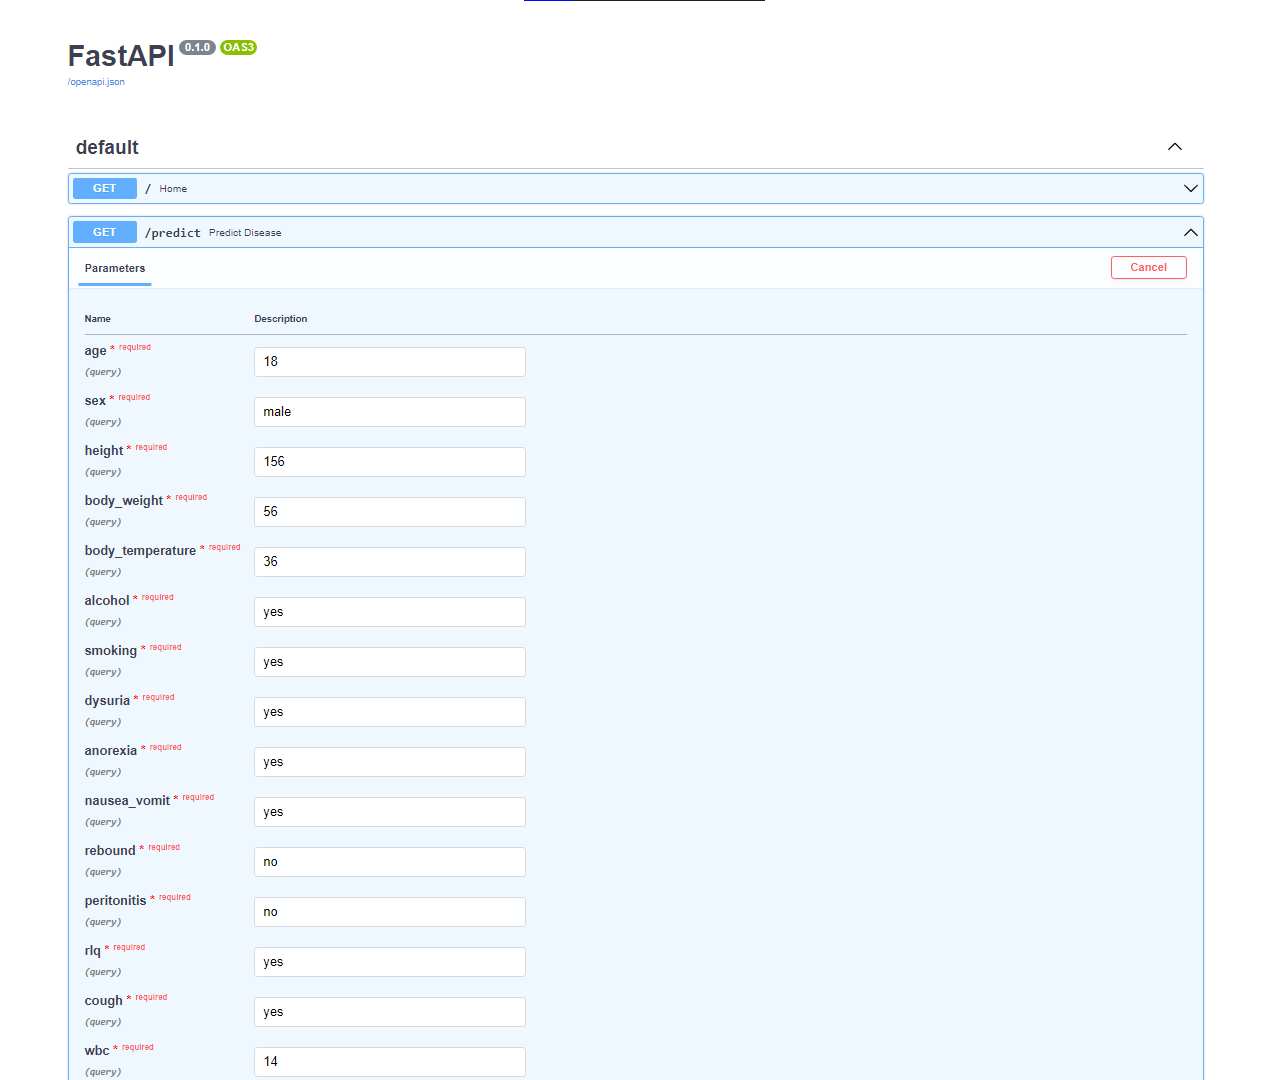
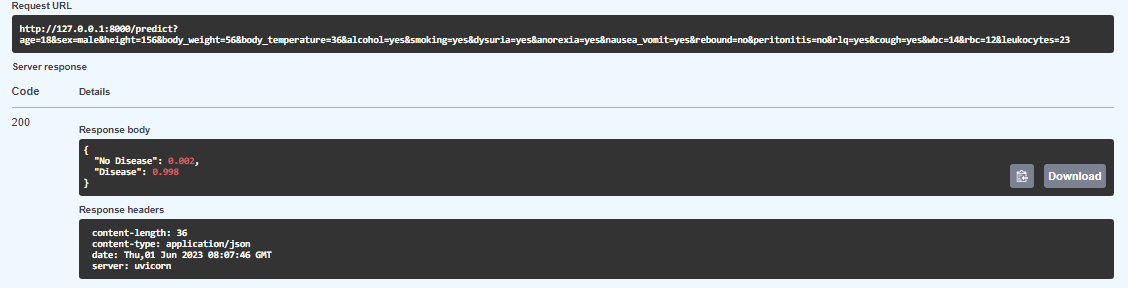

In [92]:
pip install fastapi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [93]:
pip install "uvicorn[standard]"

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Gradio
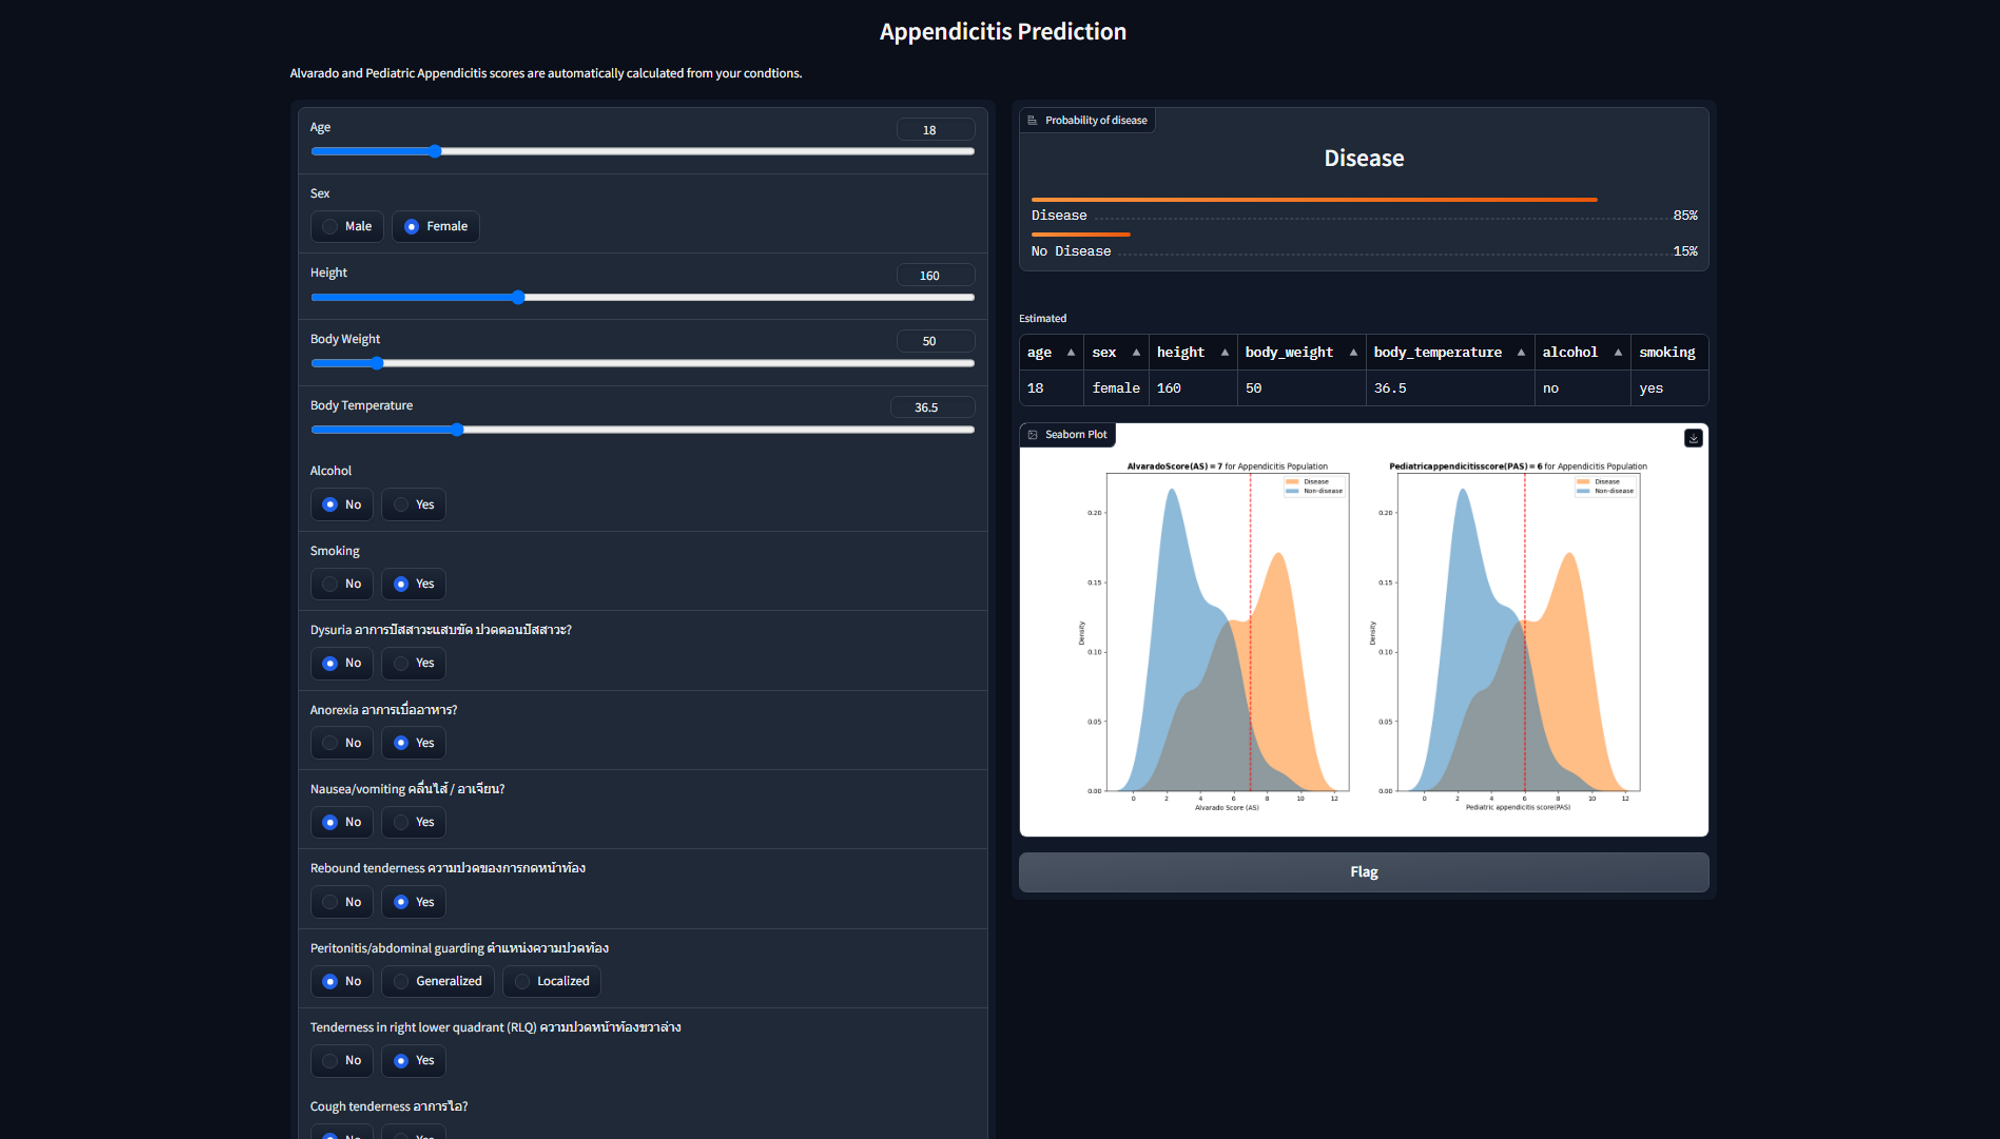

In [62]:
# !pip install gradio
import pandas as pd
import joblib
import seaborn as sns
import io
import base64
import gradio as gr

In [96]:
# inputs
age = gr.inputs.Slider(minimum=0, maximum=100, step=1, default=18, label='Age')
sex = gr.inputs.Radio(['Male', 'Female'], label='Sex')
height = gr.inputs.Slider(minimum=120, maximum=250,
                          step=1, default=160, label='Height')
body_weight = gr.inputs.Slider(minimum=40, maximum=150,
                          step=1, default=50, label='Body  Weight')
body_temperature = gr.inputs.Slider(minimum=35, maximum=42,
                          step=0.1, default=36.5, label='Body Temperature')

alcohol = gr.inputs.Radio(['No', 'Yes'], label='Alcohol')

smoking = gr.inputs.Radio(['No', 'Yes'], label='Smoking')
dysuria = gr.inputs.Radio(['No', 'Yes'], label='Dysuria อาการปัสสาวะแสบขัด ปวดตอนปัสสาวะ?')
anorexia = gr.inputs.Radio(
    ['No', 'Yes'], label='Anorexia อาการเบื่ออาหาร?')
nausea_vomit = gr.inputs.Radio(
    ['No', 'Yes'], label='Nausea/vomiting คลื่นไส้ / อาเจียน?')
rebound = gr.inputs.Radio(
    ['No', 'Yes'], label='Rebound tenderness ความปวดของการกดหน้าท้อง')
peritonitis = gr.inputs.Radio(
    ['No', 'Generalized', 'Localized'], label='Peritonitis/abdominal guarding ตำแหน่งความปวดท้อง')
rlq = gr.inputs.Radio(
    ['No', 'Yes'], label='Tenderness in right lower quadrant (RLQ) ความปวดหน้าท้องขวาล่าง')
cough = gr.inputs.Radio(
    ['No', 'Yes'], label='Cough tenderness อาการไอ?')

wbc = gr.inputs.Slider(minimum=1, maximum=70, step=0.1,
                       default=5.0, label='WBC (4.00 - 10.00) µL. (microlitre)')
rbc = gr.inputs.Slider(minimum=1, maximum=70, step=0.1,
                       default=5.0, label='RBC (4.00 - 6.00) µL. (microlitre)')
leukocytes = gr.inputs.Slider(minimum=1, maximum=150, step=0.1,
                              default=25.0, label='Leukocytes (25.00 - 40.00)%')

In [97]:
inputs = [age, sex, height, body_weight, body_temperature, alcohol, smoking, dysuria,
          anorexia, nausea_vomit, rebound, peritonitis, rlq, cough, wbc, rbc, leukocytes]
outputs = [gr.outputs.Label(label="Probability of disease", num_top_classes=2),
           gr.outputs.Dataframe(label="Estimated", type='pandas'),
           gr.outputs.Image(label="Seaborn Plot",type='pil')
           ]
title = 'Appendicitis Prediction'
description= 'Alvarado and Pediatric Appendicitis scores are automatically calculated from your condtions.'
theme = 'peach'

In [98]:
gr.Interface(fn=predict_disease,
             inputs=inputs,
             outputs=outputs,
             title=title,
             description=description,
             theme=theme,
             share=True,
             live=False).launch()

Running on local URL:  http://127.0.0.1:7878

To create a public link, set `share=True` in `launch()`.


# Reference
- **Frontiers in Pediatrics**: https://www.frontiersin.org/articles/10.3389/fped.2021.662183/full
# Researched By
Pisit Janthawee (Data Scientist)

Bachelor of science in Computer Science, Bangkok University

Bangkok, Bangkok City, Thailand

2023

# Contact
## Gmail
pisit.jant@gmail.com
## Portfolio
https://pisit-janthawee.mystrikingly.com/
## LinkedIn
https://www.linkedin.com/in/pisit-janthawee/
## Github
https://github.com/Pisit-Janthawee